Quick UltraNest tutorial with 2 correlated variables.

In [8]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ultranest

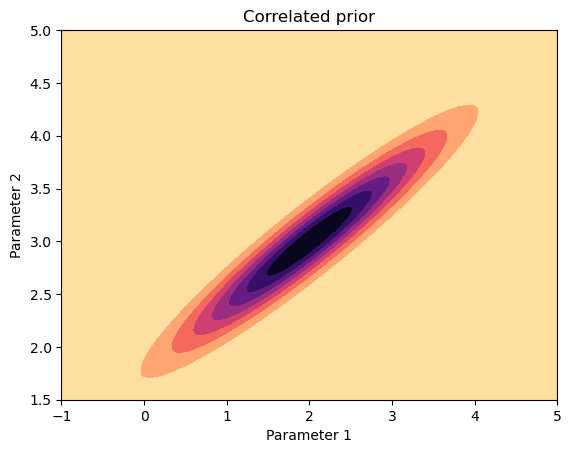

In [29]:
means = np.array([2, 3])
cov = np.array([[1, 0.6], [0.6, 0.4]])

rv = scipy.stats.multivariate_normal(means, cov)
x, y = np.linspace(-1, 5, 400), np.linspace(1.5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rv.pdf(np.transpose([X.flatten(), Y.flatten()])).reshape(X.shape)
plt.figure()
plt.title('Correlated prior')
plt.contourf(X, Y, Z, cmap='magma_r')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2');

In [34]:
a = np.linalg.inv(cov)
#Eigenvalues l and eigenvectors v
l, v = np.linalg.eigh(a)
rotation_matrix = np.dot(v, np.diag(1. / np.sqrt(l)))

def transform_correlated(quantiles):
    # sample a independent multivariate gaussian
    independent_gaussian = scipy.stats.norm.ppf(quantiles)
    # rotate and shift
    return means + np.einsum('ij,kj->ki', rotation_matrix, independent_gaussian)

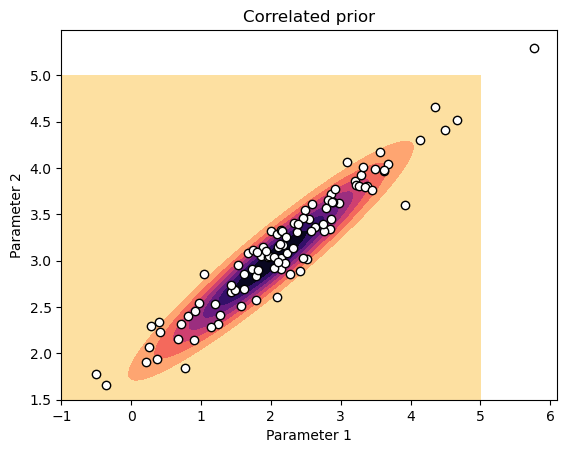

In [35]:
samples = transform_correlated(np.random.uniform(0, 1, size=(100, 2)))

plt.figure()
plt.title('Correlated prior')
plt.contourf(X, Y, Z, cmap='magma_r')
plt.plot(samples[:,0], samples[:,1], 'o', mew=1, mfc='w', mec='k')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2');

In [40]:
independent_gaussian=scipy.stats.norm.ppf(np.random.uniform(0, 1, size=(100, 2)))
np.einsum('ij,kj->ki', rotation_matrix, independent_gaussian)

array([[ 1.08345924,  0.92256538],
       [ 0.29955726,  0.31311183],
       [ 0.71264547,  0.58607898],
       [-1.2511827 , -0.92441245],
       [ 0.97089259,  0.04269765],
       [-0.40198782, -0.0948398 ],
       [ 0.39680148,  0.18348855],
       [ 0.19934951,  0.66547834],
       [-1.04317183, -0.3662294 ],
       [-0.43460378, -0.41556164],
       [-0.34639252, -0.33190495],
       [ 0.20992475, -0.14698903],
       [ 0.64566175,  0.67740495],
       [-0.07449185,  0.08941068],
       [-0.07437921, -0.47562941],
       [-0.27791179, -0.44649023],
       [-0.41487007, -0.50240802],
       [ 1.75345058,  1.15418175],
       [-1.47086753, -1.05046603],
       [-1.18172135, -0.75585999],
       [-0.14418507, -0.14984799],
       [-0.41192541, -0.31610348],
       [ 0.94817778,  0.52433882],
       [-1.01816249, -0.93487334],
       [ 0.44916549,  0.25922958],
       [ 0.10776528,  0.4249584 ],
       [ 0.71373388,  0.13959909],
       [-0.45629148,  0.09230838],
       [ 0.68901472,

In [43]:
np.dot(rotation_matrix, independent_gaussian[0])

array([1.08345924, 0.92256538])

Está rotando cada punto (100 en este caso) de la gaussiana generica 2 dimensional que hemos hecho empleando la matriz de covarianza indirectamente

In [51]:
np.shape(independent_gaussian)

(100, 2)